# Fashion Product Recommendation using Multimodel Data #

Done By
BadriNarayanan S (2348507)

### Problem Statement ###

A fashion e-commerce platform aims to improve its product recommendation system to increase user engagement and sales. The company wants to develop a system that can recommend fashion items to users based on their preferences and browsing history, leveraging both textual product descriptions and visual features extracted from product images.

### Dataset Description ###

Fashion product dataset provides detailed information about fashion products, making it suitable for various analyses, including trend analysis, category-wise distribution, color preferences, and more. Further exploration and analysis could reveal valuable insights into consumer preferences and market trends in the fashion industry.

In [ ]:
import numpy as np 
import pandas as pd 

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

##  Loading Required Packages ##

In [2]:
import numpy as np
import pandas as pd
import os 
from sklearn.metrics.pairwise import cosine_similarity
import tensorflow as tf
from sklearn.feature_extraction.text import TfidfVectorizer
import nltk
from nltk.corpus import stopwords
import tensorflow.keras as keras
from keras import Model
from keras.applications.densenet import DenseNet121
from tensorflow.keras.applications import VGG16
from keras.preprocessing import image
from keras.applications.densenet import preprocess_input, decode_predictions
from keras.layers import GlobalMaxPooling2D
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
import pathlib
import warnings
import seaborn as sns
from sklearn.metrics.pairwise import linear_kernel

In [3]:
warnings.filterwarnings("ignore")
nltk.download('stopwords', quiet=True)

True

In [ ]:
path = '../input/fashion-product-images-small/'
dataset_path = pathlib.Path(path)
dirs_names = os.listdir(dataset_path)
dirs_names

**Inference** 

Displayed the directory details.


## Data Preprocessing ##

In [5]:
def preprocessText(text):
    if isinstance(text, str):
        stop_words = set(stopwords.words('english'))
        words = nltk.word_tokenize(text)
        filtered_words = [word.lower() for word in words if word.isalpha() and word.lower() not in stop_words]
        return ' '.join(filtered_words)
    else:
        return ''

## Feature Extraction ##

In [6]:
def extractTextFeatures(text, vectorizer):
     return vectorizer.transform([text]).toarray().flatten()

In [7]:
styles_df = pd.read_csv(path + "styles.csv", nrows=6000)

In [8]:
styles_df['cleaned_text'] = styles_df['productDisplayName'].apply(preprocessText)

In [9]:
styles_df.head()

,id,gender,masterCategory,subCategory,articleType,baseColour,season,year,usage,productDisplayName,cleaned_text
0,15970,Men,Apparel,Topwear,Shirts,Navy Blue,Fall,2011,Casual,Turtle Check Men Navy Blue Shirt,turtle check men navy blue shirt
1,39386,Men,Apparel,Bottomwear,Jeans,Blue,Summer,2012,Casual,Peter England Men Party Blue Jeans,peter england men party blue jeans
2,59263,Women,Accessories,Watches,Watches,Silver,Winter,2016,Casual,Titan Women Silver Watch,titan women silver watch
3,21379,Men,Apparel,Bottomwear,Track Pants,Black,Fall,2011,Casual,Manchester United Men Solid Black Track Pants,manchester united men solid black track pants
4,53759,Men,Apparel,Topwear,Tshirts,Grey,Summer,2012,Casual,Puma Men Grey T-shirt,puma men grey


In [10]:
tfidf_vectorizer = TfidfVectorizer()
tfidf_matrix = tfidf_vectorizer.fit_transform(styles_df['cleaned_text'])

## MultiModel Fusion ##

In [51]:
combined_features = np.concatenate([tfidf_matrix.toarray(), df_embeddings], axis=1)

**Inference**

Both textual features and visual features are concatenated for product recommendations. Image Embeddings are done below.

### Calculating Cosine Similarity ###

In [52]:
sample_similarity = cosine_similarity(combined_features, combined_features)

# Getting the  indices of top similar products
top_indices = np.argsort(sample_similarity[-1])[::-1][1:6]

recommended_product_ids = styles_df.iloc[top_indices]['id']

print("Recommended Product IDs:", recommended_product_ids)

Recommended Product IDs: 4160    17417
2378    32359
2046    38003
747     47992
5851    28578
Name: id, dtype: int64


In [53]:
product_details = styles_df[styles_df['id'] == 17417]
print(product_details)

         id gender masterCategory subCategory articleType baseColour  season  \
4160  17417    Men    Accessories     Watches     Watches      Black  Winter   

      year   usage                                productDisplayName  \
4160  2016  Casual  CASIO ENTICER Men Black Dial Analogue Watch A416   

          image  
4160  17417.jpg  


### Displaying the recommended products ###

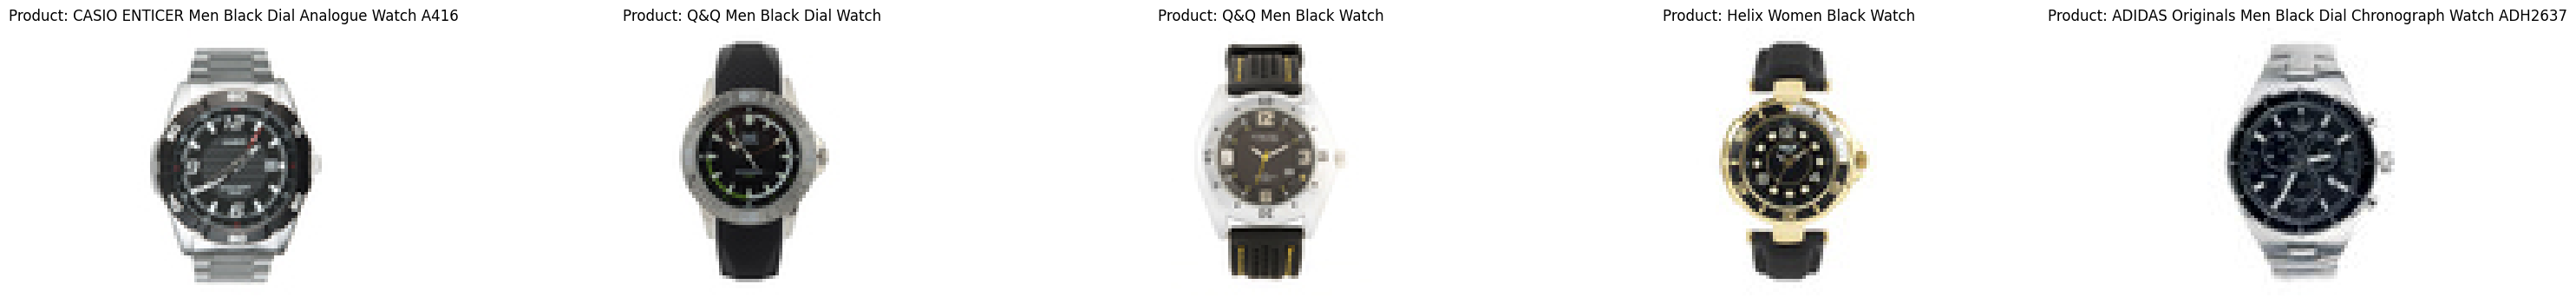

In [77]:
recommended_product_ids = styles_df.iloc[top_indices]['id']
recommended_product_images = styles_df.iloc[top_indices]['image']
recommended_product_names = styles_df.iloc[top_indices]['productDisplayName']

# Display recommended product IDs, names, and images
plt.figure(figsize=(45, 4))
for i, (product_id, product_image, product_name) in enumerate(zip(recommended_product_ids, recommended_product_images, recommended_product_names)):
    plt.subplot(1, 6, i+1)
    img = mpimg.imread(path + 'images/' + product_image)
    plt.imshow(img)
    plt.title(f'Product: {product_name}')  # Add product name to title
    plt.axis('off')
plt.show()

## Visualizing some images from the fashion dataset ##

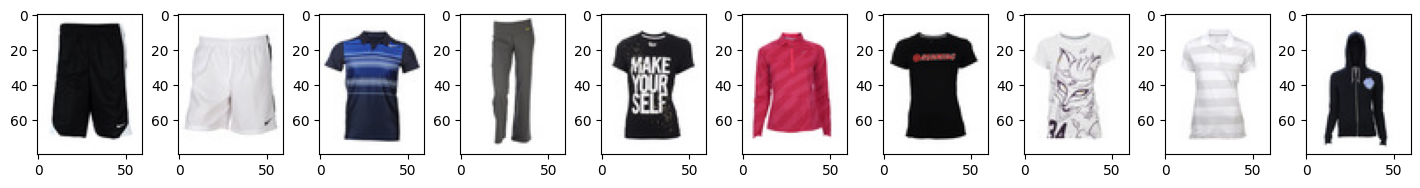

In [19]:
plt.figure(figsize=(20,20))
for i in range(20,30):
    plt.subplot(6, 10, i-10+1)
    cloth_img =  mpimg.imread(path + 'images/100' + str(i) +'.jpg') # Assign images ids
    plt.imshow(cloth_img)
plt.subplots_adjust(wspace=-0.5, hspace=1)
plt.show()

**Inference**

Displayed some random images from the fashion product images dataset.

## Reading the fashion product dataset ##

In [12]:
styles_df = pd.read_csv(path + "styles.csv", nrows=6000) # Reading 6000 product
styles_df['image'] = styles_df.apply(lambda x: str(x['id']) + ".jpg", axis=1) # Making image column contains (id.jpg)
print(styles_df.shape)
styles_df.head(5)

(6000, 11)


,id,gender,masterCategory,subCategory,articleType,baseColour,season,year,usage,productDisplayName,image
0,15970,Men,Apparel,Topwear,Shirts,Navy Blue,Fall,2011,Casual,Turtle Check Men Navy Blue Shirt,15970.jpg
1,39386,Men,Apparel,Bottomwear,Jeans,Blue,Summer,2012,Casual,Peter England Men Party Blue Jeans,39386.jpg
2,59263,Women,Accessories,Watches,Watches,Silver,Winter,2016,Casual,Titan Women Silver Watch,59263.jpg
3,21379,Men,Apparel,Bottomwear,Track Pants,Black,Fall,2011,Casual,Manchester United Men Solid Black Track Pants,21379.jpg
4,53759,Men,Apparel,Topwear,Tshirts,Grey,Summer,2012,Casual,Puma Men Grey T-shirt,53759.jpg


**Inference**

Reading the first 6000 product of the dataset, since some rows in the dataset created issues. 

In [13]:
styles_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6000 entries, 0 to 5999
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   id                  6000 non-null   int64 
 1   gender              6000 non-null   object
 2   masterCategory      6000 non-null   object
 3   subCategory         6000 non-null   object
 4   articleType         6000 non-null   object
 5   baseColour          6000 non-null   object
 6   season              5998 non-null   object
 7   year                6000 non-null   int64 
 8   usage               5946 non-null   object
 9   productDisplayName  5999 non-null   object
 10  image               6000 non-null   object
dtypes: int64(2), object(9)
memory usage: 515.8+ KB


**Inference**

There is not that much null values in the dataset

## Data Visualization ##

<Axes: ylabel='articleType'>

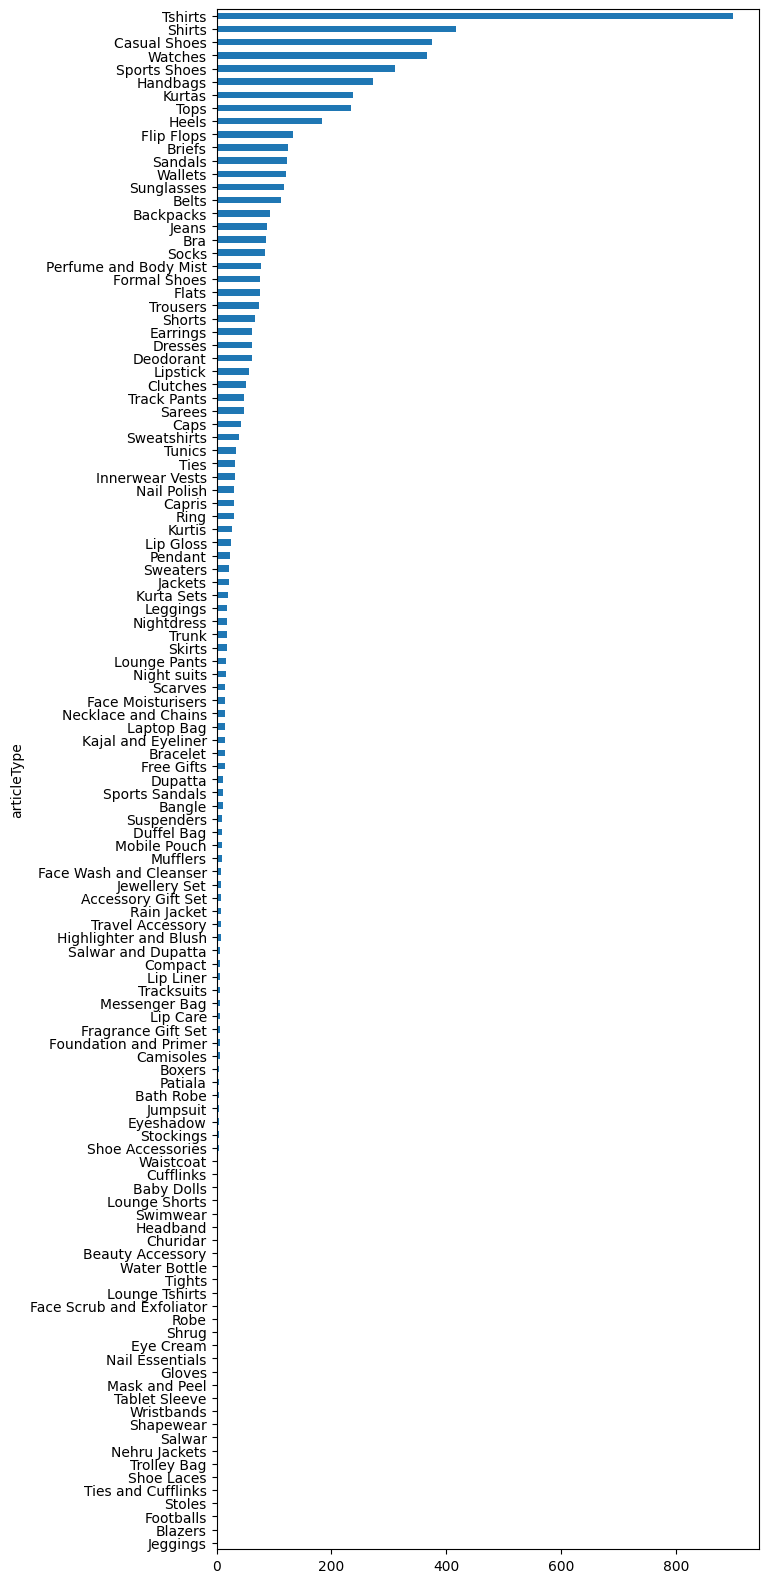

In [14]:
plt.figure(figsize=(7,20))
styles_df.articleType.value_counts().sort_values().plot(kind='barh')

**Inference**

Displayed the count of all the image classes in the dataset.

### Image Embeddings ###

In [15]:
img_width, img_height, chnls = 224, 224, 3

**Inference**

Setting width, height and channels of the image

### Pretrained VGG16 Model ###

In [16]:
vgg16 = VGG16(include_top=False, weights='imagenet', input_shape=(img_width, img_height, chnls))
vgg16.trainable=False
vgg16_model = keras.Sequential([vgg16, GlobalMaxPooling2D()])
vgg16_model.summary()

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ vgg16 (Functional)              │ ?                      │    14,714,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_max_pooling2d            │ ?                      │   0 (unbuilt) │
│ (GlobalMaxPooling2D)            │                        │               │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,714,688 (56.13 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 14,714,688 (56.13 MB)

**Inference**

Loading the pre-trained VGG16 model for feature extraction. VGG16 is a convolutional neural network used for image classification. 

In [17]:
def img_path(img):
    return path + 'images/' + img

### Loading and preprocessing the Image and then making predictions ###

In [18]:
def predict(model, img_name):
    # Reshape
    img = image.load_img(img_path(img_name), target_size=(img_width, img_height))
    # img to Array
    img = image.img_to_array(img)
    # Expand Dim (1, w, h)
    img = np.expand_dims(img, axis=0)
    # Pre process Input
    img = preprocess_input(img)
    return model.predict(img)

In [ ]:
def get_embeddings(df, model):
    df_copy = df
    df_embeddings = df_copy['image'].apply(lambda x: predict(vgg16_model, x).reshape(-1))
    df_embeddings = df_embeddings.apply(pd.Series)
    return df_embeddings

df_embeddings = get_embeddings(styles_df, vgg16_model)

**Inference**

It will return a dataframe that contains images features.

In [20]:
df_embeddings.to_csv("/kaggle/working/df_embeddings.csv", index=False)

In [21]:
df_embeddings.head(5)

,0,1,2,3,4,5,6,7,8,9,...,502,503,504,505,506,507,508,509,510,511
0,18686.669922,1771.477661,34884.214844,7608.161621,13893.837891,5915.324219,6887.691406,3767.206299,15775.456055,1209.128052,...,6896.290039,2415.531738,12914.957031,5724.900879,20715.078125,5764.532227,2448.288574,1506.986450,1952.420532,3710.467285
1,33987.589844,11408.692383,40191.152344,4917.734375,27242.154297,9847.646484,18809.490234,16128.450195,32276.486328,4342.761230,...,10407.451172,17312.980469,24714.019531,22229.214844,27725.205078,8050.595703,13997.051758,2896.062012,5984.395508,17835.279297
2,15612.058594,5204.512695,27414.439453,12554.933594,4181.386719,5661.430176,6569.651367,3428.564941,12262.506836,3149.586426,...,10146.785156,3687.133057,12756.014648,6254.875488,5098.333008,5159.093262,4169.649414,3604.706787,3925.329590,885.752319
3,30808.388672,11944.158203,30446.765625,4738.958496,26014.546875,8571.813477,14129.811523,16472.986328,32694.490234,3077.296143,...,9241.375000,15784.468750,23060.740234,20504.757812,24931.636719,8081.603516,13237.635742,4584.151855,4709.733887,19660.703125
4,23744.416016,7651.368164,38329.277344,10264.341797,23176.203125,10855.338867,14045.220703,6172.713867,25688.230469,1813.025879,...,9434.967773,7794.635254,19148.560547,16483.179688,25021.718750,5983.926758,6335.545898,1473.295288,3409.114014,10126.218750


**Inference**

As a outcome of image embeddings, features are extracted.

### Product Recommendation using Image Embeddings ###

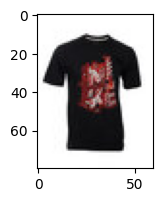

In [62]:
link="../input/fashion-product-images-small/images/10008.jpg"
a = plt.imread(link)
plt.figure(figsize=(15,2))
plt.imshow(a)

In [43]:
sampleImage = predict(vgg16_model, '10008.jpg')
sampleImage.shape

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


(1, 512)

In [44]:
df_sample_image = pd.DataFrame(sampleImage)  
print(df_sample_image)

            0            1             2            3             4    \
0  25410.234375  6599.317383  41702.773438  8096.277832  16759.294922   

           5             6            7             8            9    ...  \
0  8549.931641  11254.272461  7404.527832  26782.421875  5922.380859  ...   

           502           503           504           505           506  \
0  8124.932617  11893.453125  20741.033203  15997.679688  27921.451172   

          507          508          509          510           511  
0  5068.69873  9273.171875  1605.959961  3435.837158  11098.413086  

[1 rows x 512 columns]


In [45]:
sampleSimilarity = linear_kernel(df_sample_image, df_embeddings)
print(sampleSimilarity)

[[9.56740567e+10 1.45329193e+11 6.98132234e+10 ... 1.14281275e+11
  1.28790979e+11 2.02975330e+11]]


In [46]:
def getSimilarity(model):
    sample_image = predict(vgg16_model, '10008.jpg')
    df_sample_image = pd.DataFrame(sample_image)
    sample_similarity = linear_kernel(df_sample_image, df_embeddings)
    return sample_similarity

In [47]:
def normalizeSim(similarity):
    x_min = similarity.min(axis=1)
    x_max = similarity.max(axis=1)
    norm = (similarity-x_min)/(x_max-x_min)[:, np.newaxis]
    return norm

In [48]:
sample_similarity_norm = normalizeSim(sampleSimilarity)
sample_similarity_norm.shape

(1, 6000)

In [49]:
def getRecommendations(df, similarity):
    
    sim_scores = list(enumerate(similarity[0]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[0:5]
    print(sim_scores)
    cloth_indices = [i[0] for i in sim_scores]
    return df['image'].iloc[cloth_indices]

[(725, 1.0), (233, 0.98292464), (487, 0.91976565), (500, 0.90462863), (3662, 0.8602926)]


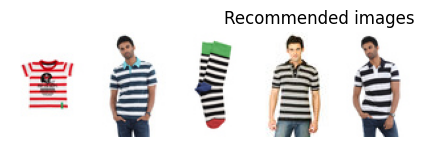

In [81]:
recommendation = getRecommendations(styles_df, sample_similarity_norm)
recommendation_list = recommendation.to_list()

#recommended images
plt.figure(figsize=(20,15))
j=0
for i in recommendation_list:
    plt.subplot(6, 10, j+1)
    cloth_img =  mpimg.imread(path + 'images/'+ i)
    plt.imshow(cloth_img)
    plt.axis("off")
    j+=1
plt.title("Recommended images",loc='right')
plt.subplots_adjust(wspace=-0.9, hspace=1)
plt.show()

# Conclusion #

Thus the case study illustrates the effectiveness of deep learning techniques for developing multimodal recommendation systems that leverage both text and image data. By combining information from textual product descriptions and visual features extracted from images, the model can provide more accurate and personalized recommendations, leading to improved user satisfaction and engagement on the fashion e-commerce platform.

Used Cosine Similarity to recommend similar products.  